In [ ]:
import json
import math
import pickle
import random
from dataclasses import dataclass

import matplotlib.pyplot as plt
import networkx as nx

from circvs.datatypes import *

In [ ]:
with open("ioi-snp.pkl", "rb") as f:
    edges = pickle.load(f)

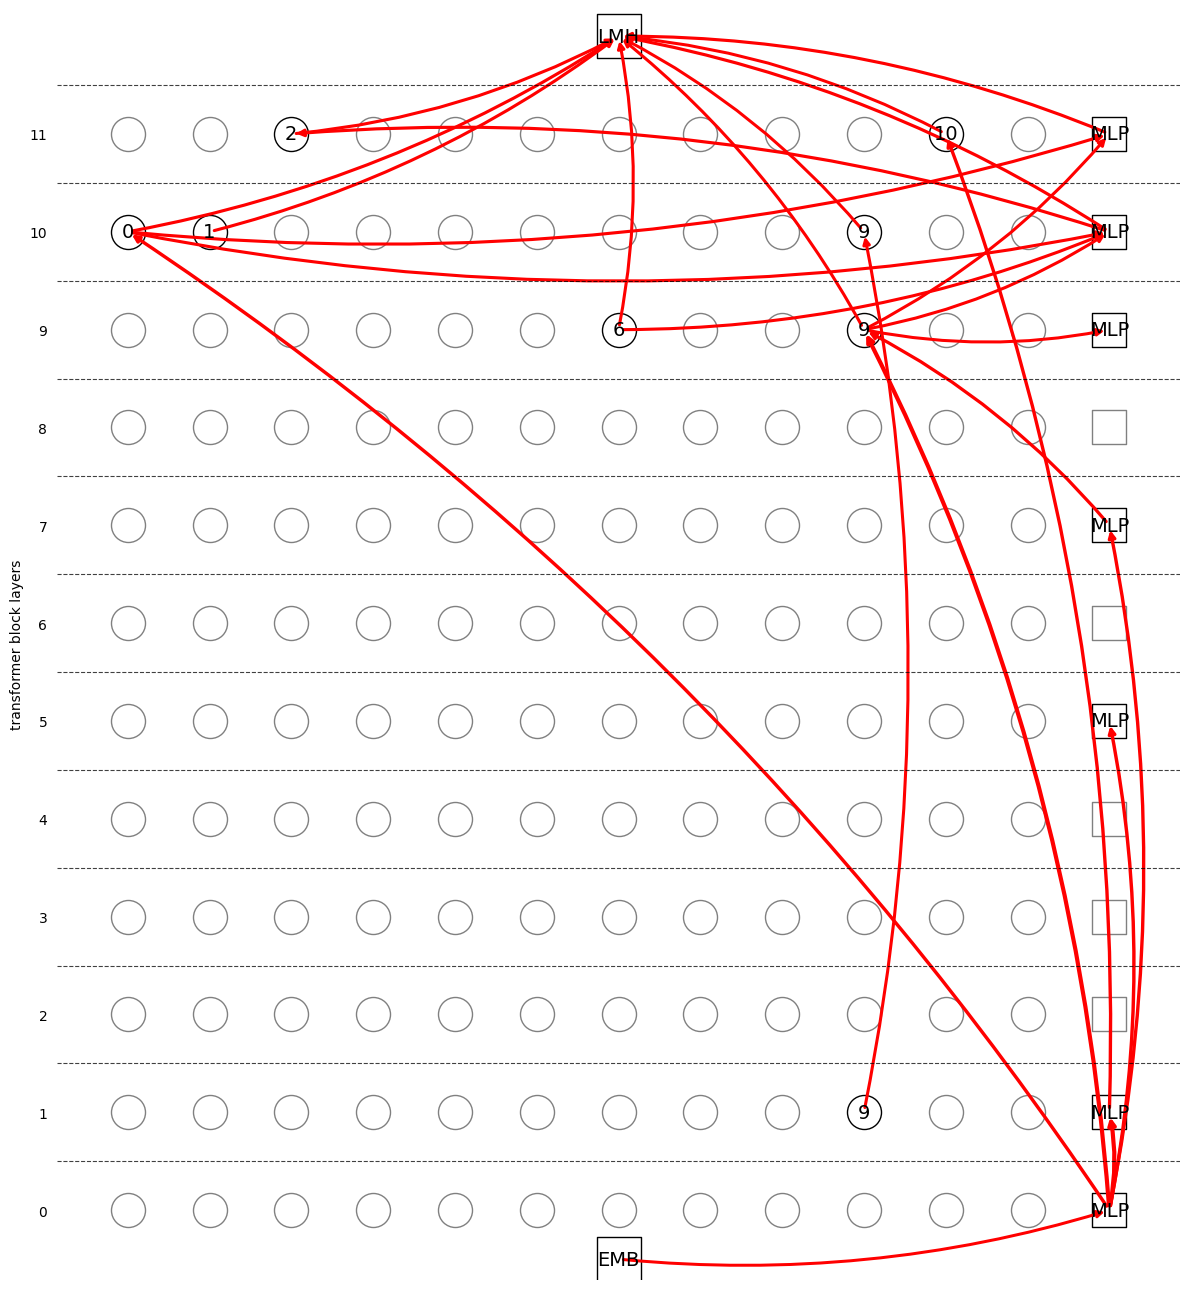

In [ ]:
n_layers = 12
n_heads = 12

def place_node(node):
    if node.cmpt == "emb":
        return n_heads / 2, node.layer - .5
    if node.cmpt == "lmh":
        return n_heads / 2, node.layer + 1
    if node.cmpt == "mlp":
        return n_heads, node.layer
    # if node.cmpt == "sa":
    return node.head, node.layer

edges = sorted(edges, key=lambda e: e.weight, reverse=True)#[:15]
involved_nodes = set()
for edge in edges:
    involved_nodes.add(edge.src)
    involved_nodes.add(edge.dst)

nodes_list = [Node("mlp", layer, None, None) for layer in range(n_layers)]
nodes_list += [Node("sa", layer, head, None) for head in range(n_heads) for layer in range(n_layers)]
nodes_list.append(Node("emb", 0, None, None))
nodes_list.append(Node("lmh", 12, None, None))

uninvolved_nodes = set(nodes_list) - involved_nodes


graph = nx.DiGraph({n:[] for n in nodes_list})

for edge in edges:
    graph.add_edge(edge.src, edge.dst, weight=edge.weight)

pos = {n: place_node(n) for n in graph.nodes}

fig, ax = plt.subplots(figsize=(12, 13))
nx.draw_networkx_nodes(graph, pos, node_size=1000, node_shape="s", node_color='w', edgecolors='k', nodelist=[n for n in involved_nodes if n.cmpt == "lmh"], ax=ax).set_zorder(0)
nx.draw_networkx_nodes(graph, pos, node_size=1000, node_shape="s", node_color='w', edgecolors='k', nodelist=[n for n in involved_nodes if n.cmpt == "emb"], ax=ax).set_zorder(0)
nx.draw_networkx_nodes(graph, pos, node_size=600, node_shape="o", node_color='w', edgecolors='k', nodelist=[n for n in involved_nodes if n.cmpt == "sa"], ax=ax).set_zorder(0)
nx.draw_networkx_nodes(graph, pos, node_size=600, node_shape="s", node_color='w', edgecolors='k', nodelist=[n for n in involved_nodes if n.cmpt == "mlp"], ax=ax).set_zorder(0)
nx.draw_networkx_nodes(graph, pos, node_size=600, node_shape="o", node_color='w', edgecolors='gray', nodelist=[n for n in uninvolved_nodes if n.cmpt == "sa"], ax=ax).set_zorder(0)
nx.draw_networkx_nodes(graph, pos, node_size=600, node_shape="s", node_color='w', edgecolors='gray', nodelist=[n for n in uninvolved_nodes if n.cmpt == "mlp"], ax=ax).set_zorder(0)

nx.draw_networkx_labels(graph, pos, labels={n: n.head if n.head is not None else n.cmpt.upper() for n in involved_nodes}, font_size=14, ax=ax)

max_w = max(e.weight for e in edges)
weights = [e.weight / max_w + .5 for e in edges]
for e, edge in enumerate(graph.edges(data='weight')):
    nx.draw_networkx_edges(graph, pos, edgelist=[edge], width=weights[e]*2, edge_color='r', node_size=50, connectionstyle="arc3, rad=0.1", ax=ax)

ax.set_ylabel("transformer block layers")
# ax.set_xlabel("token positions")
ax.tick_params(labelleft=True, labelbottom=False)
# ax.set_xticks(range(d.n_positions))
ax.set_yticks(range(n_layers))

# ax.set_xticks(ax.get_xticks() + 0.5, minor=True)
ax.set_yticks(ax.get_yticks() + 0.5, minor=True)
ax.grid(False, which='major')
ax.grid(True, which='minor', linestyle='--', color='black', alpha=0.75)

ax.margins(y=0.01, x=0.02)
fig.tight_layout()
# plt.grid(False)
plt.box(False)

In [ ]:
with open("cap-eap.pkl", "rb") as f:
    edges = pickle.load(f)

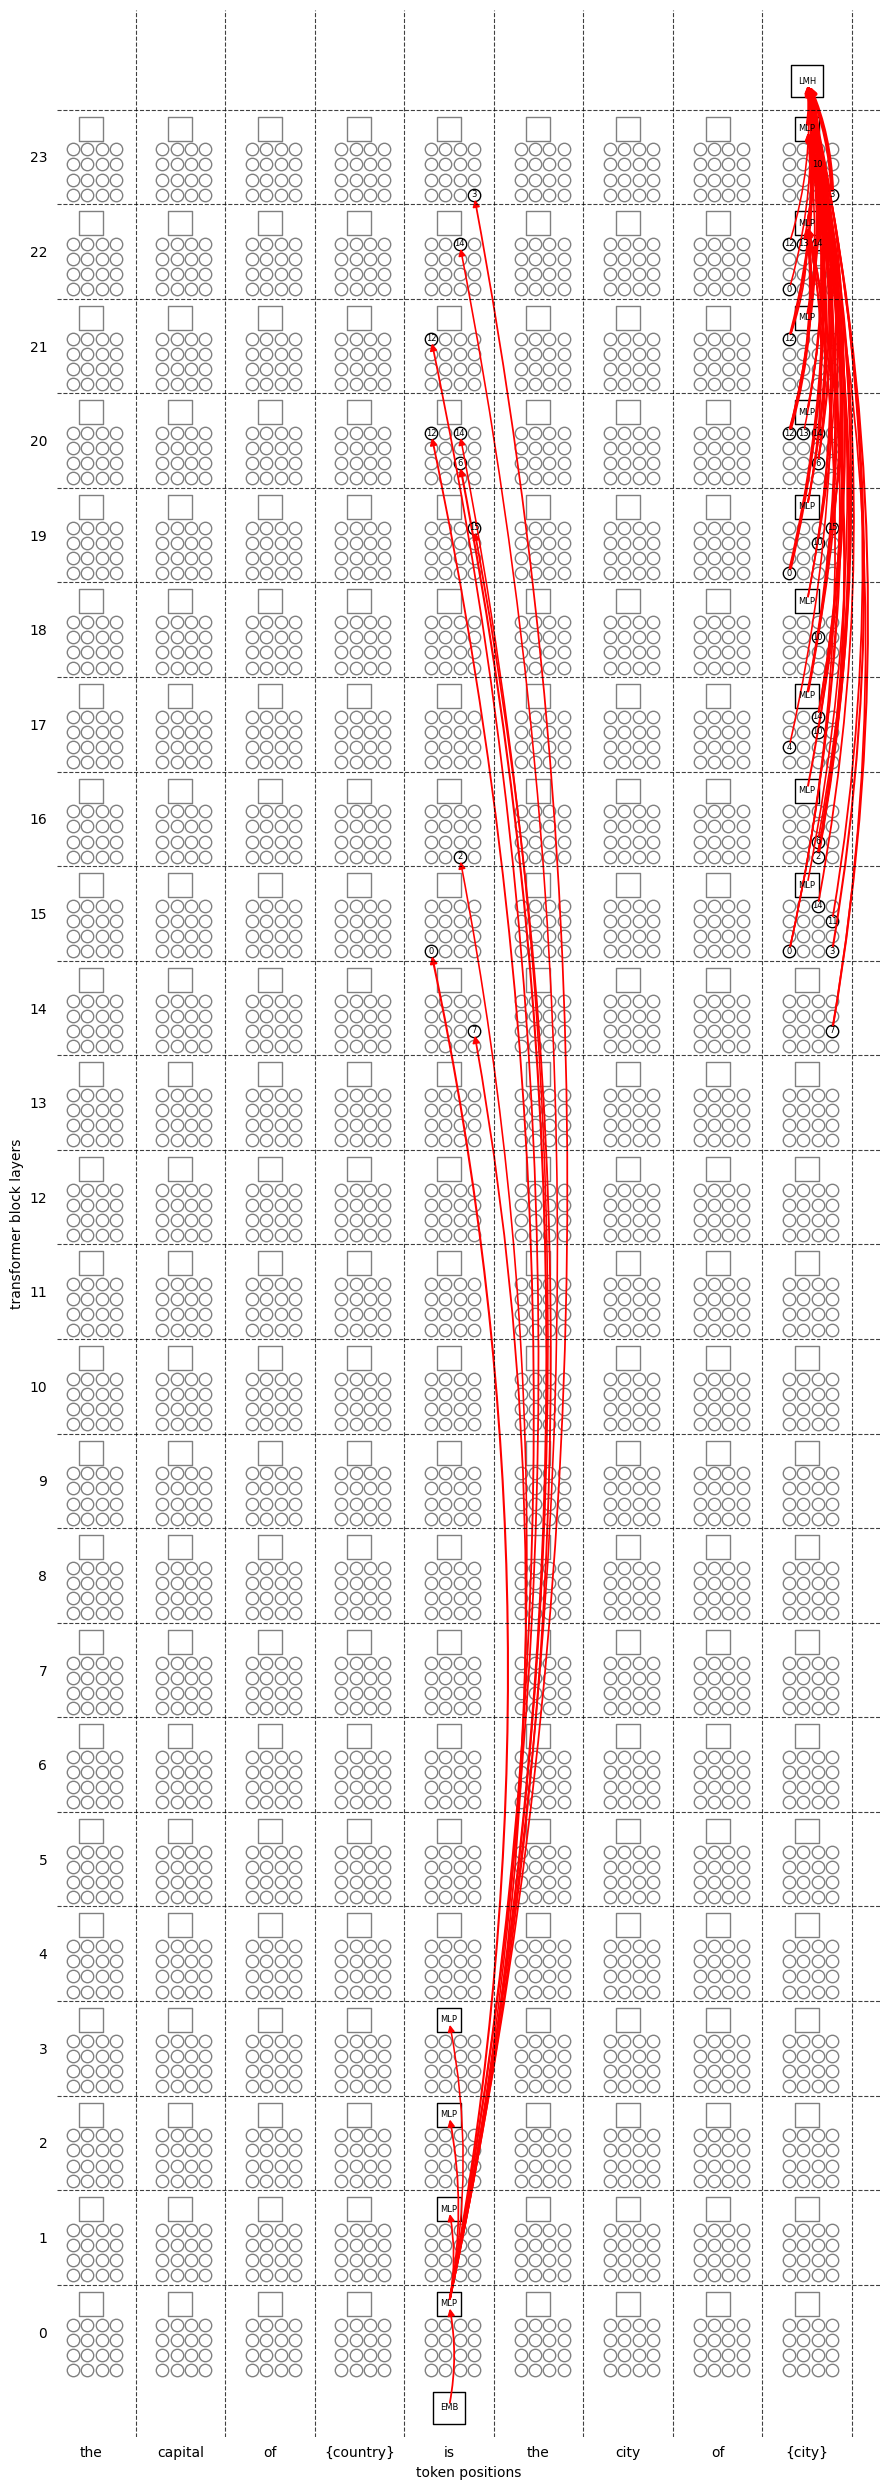

In [ ]:
n_layers = 24
n_heads = 16
n_positions = 9

def place_node(node):
    if node.cmpt == "emb":
        return node.position, node.layer - .8
    if node.cmpt == "lmh":
        return node.position, node.layer + .8
    if node.cmpt == "mlp":
        return node.position, node.layer + 0.3
    # if node.cmpt == "sa":
    return node.position + node.head % 4 * .16 - .2, node.layer + node.head // 4 * .16 - .4


# edges = sorted(edges, key=lambda e: e.weight, reverse=True)#[:15]
involved_nodes = set()
for edge in edges:
    involved_nodes.add(edge.src)
    involved_nodes.add(edge.dst)

nodes_list = [Node("mlp", layer, None, pos) for pos in range(n_positions) for layer in range(n_layers)]
nodes_list += [Node("sa", layer, head, pos) for pos in range(n_positions) for head in range(n_heads) for layer in range(n_layers)]
nodes_list += [Node("emb", 0, None, pos) for pos in range(n_positions)]
nodes_list += [Node("lmh", 12, None, pos) for pos in range(n_positions)]

uninvolved_nodes = set(nodes_list) - involved_nodes


graph = nx.DiGraph({n:[] for n in nodes_list})

for edge in edges:
    graph.add_edge(edge.src, edge.dst, weight=edge.weight)

pos = {n: place_node(n) for n in graph.nodes}

fig, ax = plt.subplots(figsize=(n_positions, n_layers + 1))
nx.draw_networkx_nodes(graph, pos, node_size=500, node_shape="s", node_color='w', edgecolors='k', nodelist=[n for n in involved_nodes if n.cmpt == "lmh"], ax=ax).set_zorder(0)
nx.draw_networkx_nodes(graph, pos, node_size=500, node_shape="s", node_color='w', edgecolors='k', nodelist=[n for n in involved_nodes if n.cmpt == "emb"], ax=ax).set_zorder(0)
nx.draw_networkx_nodes(graph, pos, node_size=80, node_shape="o", node_color='w', edgecolors='k', nodelist=[n for n in involved_nodes if n.cmpt == "sa"], ax=ax).set_zorder(0)
nx.draw_networkx_nodes(graph, pos, node_size=300, node_shape="s", node_color='w', edgecolors='k', nodelist=[n for n in involved_nodes if n.cmpt == "mlp"], ax=ax).set_zorder(0)
nx.draw_networkx_nodes(graph, pos, node_size=80, node_shape="o", node_color='w', edgecolors='gray', nodelist=[n for n in uninvolved_nodes if n.cmpt == "sa"], ax=ax).set_zorder(0)
nx.draw_networkx_nodes(graph, pos, node_size=300, node_shape="s", node_color='w', edgecolors='gray', nodelist=[n for n in uninvolved_nodes if n.cmpt == "mlp"], ax=ax).set_zorder(0)

nx.draw_networkx_labels(graph, pos, labels={n: n.head if n.head is not None else n.cmpt.upper() for n in involved_nodes}, font_size=6, ax=ax)

max_w = max(e.weight for e in edges)
weights = [e.weight / max_w + .5 for e in edges]
for e, edge in enumerate(graph.edges(data='weight')):
    nx.draw_networkx_edges(graph, pos, edgelist=[edge], width=weights[e]*2, edge_color='r', node_size=50, connectionstyle="arc3, rad=0.1", ax=ax)

ax.set_ylabel("transformer block layers")
ax.set_xlabel("token positions")
ax.tick_params(labelleft=True, labelbottom=True)
ax.set_xticks(range(n_positions), ["the", "capital", "of", "{country}", "is", "the", "city", "of", "{city}"])
ax.set_yticks(range(n_layers))

ax.set_xticks(ax.get_xticks() + 0.5, minor=True)
ax.set_yticks(ax.get_yticks() + 0.5, minor=True)
ax.grid(False, which='major')
ax.grid(True, which='minor', linestyle='--', color='black', alpha=0.75)

ax.margins(y=0.01, x=0.02)
fig.tight_layout()
# plt.grid(False)
plt.box(False)